In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Colab Notebooks/ECG/Model_1.h5")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,212 (9.24 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define class labels
classes = [
    "Normal",
    "Abnormal"
]

def test_image_with_bargraph(img_path, use_mobilenet=False):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224)) # Changed target size back to 128x128
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    if use_mobilenet:
        # Note: If using a MobileNetV2 model, you'd typically use its preprocess_input
        # function and target_size would likely be 224x224.
        # Since the loaded model expects 128x128, use_mobilenet=True might not be appropriate
        # unless your loaded model is a 128x128 version of MobileNet or a different architecture.
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    else:
        img_array = img_array / 255.0 # Basic scaling for other models

    # Predict with the already loaded model
    pred = model.predict(img_array)[0]  # get prediction vector

    # Find predicted class
    class_idx = np.argmax(pred)
    prediction = classes[class_idx]
    confidence = np.max(pred) * 100

    # Plot bar graph with percentages
    plt.figure(figsize=(6,7))
    bars = plt.bar(classes, pred*100, color=["green","blue"])
    plt.ylabel("Confidence (%)")
    plt.title("Prediction Probabilities")

    # Add percentage text on each bar
    for bar, value in zip(bars, pred*100):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f"{value:.2f}%", ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.show()

    return prediction, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


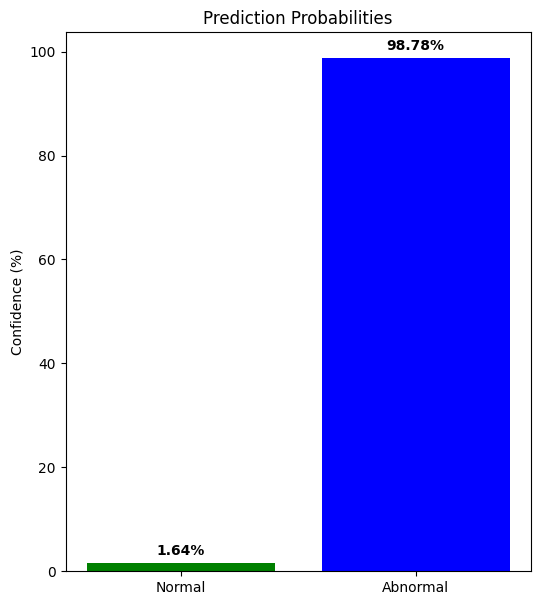

Final Prediction of the Image is : Abnormal With Confidence of  (98.78%)


In [ ]:
# Replace with the path to your test image
image_path_for_test = "/content/Normal(9).jpg" # Example path, change this

prediction, conf = test_image_with_bargraph(image_path_for_test, use_mobilenet=False)
print("Final Prediction of the Image is :", prediction, "With Confidence of ",f"({conf:.2f}%)")